from this data,I am trying to build an over powered team suitable for my playing style and my budget as I will try to understand some of players stats and rating  

In [1]:
#Importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Turning off the warnings
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
#Imprting the Date
fifa = pd.read_csv('fifa21_male2.csv')

In [3]:
fifa.shape

(17125, 107)

In [4]:
#to display all the columns 
pd.set_option('display.max_columns',170)

In [5]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


Droping all the columns I think it is not usefull to my analyze 

In [6]:
fifa.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [7]:
fifa.drop(['ID','Position','Club Logo','Player Photo','Flag Photo','Team & Contract','Team & Contract'],axis=1,inplace=True)
fifa.drop(['Joined','Loan Date End','Value','Wage','Release Clause','Contract'],axis=1,inplace=True)
fifa.drop(['IR','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LAM'],axis=1,inplace=True)
fifa.drop(['LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB'],axis=1,inplace=True)
fifa.drop(['LB','LCB','CB','RCB','RB','GK','Gender','Hits'],axis=1,inplace=True)

I am interested in only gold players so I will filter out all the players which are not by taking all players with a rating above75

In [8]:
fifa=fifa[(fifa['OVA']>75)].reset_index(drop=True)

In [9]:
fifa.shape

(1743, 65)

now we have only 1743 gold players out of more than 17000, meaning gold players present around 10% of all players.
Next I will check the info to check the data types if it is correct

In [10]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 65 columns):
Name                1743 non-null object
Age                 1743 non-null int64
OVA                 1743 non-null int64
Nationality         1743 non-null object
Club                1738 non-null object
BOV                 1743 non-null int64
BP                  1743 non-null object
POT                 1743 non-null int64
Height              1743 non-null object
Weight              1743 non-null object
foot                1743 non-null object
Growth              1743 non-null int64
Attacking           1743 non-null int64
Crossing            1743 non-null int64
Finishing           1743 non-null int64
Heading Accuracy    1743 non-null int64
Short Passing       1743 non-null int64
Volleys             1719 non-null float64
Skill               1743 non-null int64
Dribbling           1743 non-null int64
Curve               1719 non-null float64
FK Accuracy         1743 non-null int64
Lo

it shows that Highet and Weight are not in the correct format so is weak foot and skill movement so I will check the data head to see why!

In [11]:
fifa.head(2)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,"5'7""",150lbs,Right,0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,58,70,85,85,63,59
1,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,77,"5'7""",159lbs,Left,0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,44,71,83,77,62,66


Weight and Height are in pounds feets and which contain a nun numeric values as describtion for unit which I do not understand so I will conver it to KGs and CMs, weak foot and skill move are containg a star semple and all should be clean and correct by the next function

In [12]:
def cleaning(x):
    try:
        #Height
        x = x.replace("'",".")
        x = x.replace('"',"")
        #Weight
        x=x.replace("lbs",'')
        # W/F and SM
        x=x.replace("★",'')
        if ((".") in x):
            x = x.split(".")
            x = round((int(x[0])*12+int(x[1])) * 2.54, 1)
        return int(x)
    
    except:
        return int(x)
fifa['Height']= fifa['Height'].apply(cleaning)
#clean the weight and conver it to KG as integers
fifa['Weight'] = ((fifa['Weight'].apply(cleaning))*0.453592).astype(int)
fifa['W/F']= fifa['W/F'].apply(cleaning)
fifa['SM'] = fifa['SM'].apply(cleaning)

Checking again the columns info to check the corrections and the missing values

In [13]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 65 columns):
Name                1743 non-null object
Age                 1743 non-null int64
OVA                 1743 non-null int64
Nationality         1743 non-null object
Club                1738 non-null object
BOV                 1743 non-null int64
BP                  1743 non-null object
POT                 1743 non-null int64
Height              1743 non-null int64
Weight              1743 non-null int32
foot                1743 non-null object
Growth              1743 non-null int64
Attacking           1743 non-null int64
Crossing            1743 non-null int64
Finishing           1743 non-null int64
Heading Accuracy    1743 non-null int64
Short Passing       1743 non-null int64
Volleys             1719 non-null float64
Skill               1743 non-null int64
Dribbling           1743 non-null int64
Curve               1719 non-null float64
FK Accuracy         1743 non-null int64
Long

my guess for the missing values that they return to Goalkeeprs so I will check it out

In [14]:
fifa[fifa['BP']=='GK'].head()

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
7,O. Kahn,38,87,Germany,FC Bayern München,87,GK,90,188,89,Right,3,84,21,21,21,21,NaN,113,21,NaN,7,62,23,204,57,62,NaN,85,NaN,179,22,NaN,51,85,21,228,94,91.0,22.0,NaN,21,NaN,42,21,21,NaN,346,83,88,62,92,83,1196,468,1,1,NaN,NaN,83,88,62,83,60,92
8,J. Lehmann,39,79,Germany,VfB Stuttgart,81,GK,87,190,87,Right,8,90,21,21,21,27,NaN,128,21,NaN,10,75,22,171,49,54,NaN,68,NaN,179,29,NaN,55,74,21,291,78,81.0,58.0,NaN,74,NaN,42,21,21,NaN,323,77,82,75,88,76,1224,450,3,1,NaN,NaN,77,82,75,76,52,88
11,G. Buffon,42,82,Italy,Juventus,82,GK,82,193,92,Right,0,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,2,1,Medium,Medium,77,76,74,78,33,91
30,Casillas,38,79,Spain,FC Porto,79,GK,79,185,83,Left,0,85,13,12,25,21,14.0,108,25,25.0,13,22,23,291,56,55,60.0,74,46.0,246,45,77.0,41,70,13,147,23,22.0,16.0,62.0,24,70.0,48,24,11,13.0,375,82,73,60,83,77,1300,430,2,1,Medium,Medium,82,73,60,77,55,83
79,Júlio César,37,80,Brazil,SL Benfica,78,GK,80,185,78,Left,0,82,18,12,18,23,11.0,107,27,16.0,11,21,32,282,39,43,69.0,75,56.0,213,14,75.0,35,72,17,154,37,25.0,12.0,67.0,13,68.0,45,19,10,16.0,380,83,77,62,77,81,1263,421,3,1,Medium,Medium,83,77,62,81,41,77


my guess was not correct since some of the values ara missing while other have numeric so I am going to fill the missing data for all columns by the function below

In [15]:
def missing_value (name_of_the_column):
    
    fifa[name_of_the_column] = fifa.groupby(['OVA','BP'])[name_of_the_column].apply(lambda x: x.fillna(x.mean()))
    fifa[name_of_the_column] = fifa[name_of_the_column].fillna(int(fifa[name_of_the_column].mean()))

for i in ['Balance','Jumping','Volleys','Curve','Agility','Interceptions','Positioning','Vision','Composure','Sliding Tackle']:
    missing_value(i)


similer function but it will take the most frequent object based on both rating and position 

In [16]:

def missing_object (name_of_the_column):
    
    fifa[name_of_the_column] = fifa.groupby(['OVA','BP'])[name_of_the_column].apply(lambda x: x.fillna(x.value_counts().idxmax()))
    fifa[name_of_the_column] = fifa[name_of_the_column].fillna(fifa[name_of_the_column].value_counts().idxmax())
for j in ['A/W','D/W']:
    missing_object(j)


checking for null values expecting it will be five which are in the club name and I don't belive it worth fixing

In [17]:
fifa.isnull().sum().sum()

5

now I will create multiple data frames based on each position

In [18]:
positions=[]
for i in fifa.BP.unique():
    positions.append(i)
    vars()[i]=fifa[fifa['BP']==i].reset_index(drop=True)


print(positions)

['CAM', 'CM', 'CB', 'CF', 'GK', 'CDM', 'RWB', 'LB', 'ST', 'RM', 'LWB', 'RW', 'LW', 'LM', 'RB']


to explain the above loop the vars() function will convert the assigned string to a variable that will equal the data frame where the position equal the string, to check the result I will check the head of the position LWB data frame

In [19]:
LWB.head(2)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,Maxwell,34,79,Brazil,Paris Saint-Germain,79,LWB,79,175,73,Left,0,377,86,71,68,82,70.0,364,75,72.0,52,82,83,370,71,74,76.0,77,72.0,368,71,72.0,83,70,72,353,71,78.0,71.0,74.0,59,81.0,234,81,78,75.0,48,7,6,16,13,6,2114,452,2,3,Medium,Medium,73,71,79,77,78,74
1,M. Schäfer,32,76,Germany,VfL Wolfsburg,75,LWB,76,182,74,Left,0,344,85,58,66,76,59.0,368,72,78.0,70,75,73,338,65,66,66.0,76,65.0,377,81,72.0,73,73,78,344,75,75.0,63.0,67.0,64,77.0,227,74,76,77.0,53,13,11,10,6,13,2051,428,3,2,High,Medium,66,67,76,72,74,73


now I will create six more data frames that will contain attacking as ST and CF, midfield containg CM, CDM and CAM , defenders containg CB,RB,RWB,LB and LWB ,leftfield containg LM and LW, rightfield containg RM and RW , and finally sides containg right and left sides

In [20]:
attacking=pd.concat([ST, CF], axis = 0).sort_values(by=['OVA'], ascending=False).reset_index(drop=True)
defending=pd.concat([RWB,RB,CB,LB,LWB], axis = 0).sort_values(by=['OVA'], ascending=False).reset_index(drop=True)
midfield=pd.concat([CM,CAM,CDM], axis = 0).sort_values(by=['OVA'], ascending=False).reset_index(drop=True)

rightfield=pd.concat([RM,RW], axis = 0).sort_values(by=['OVA'], ascending=False).reset_index(drop=True)
leftfield=pd.concat([LM,LW], axis = 0).sort_values(by=['OVA'], ascending=False).reset_index(drop=True)

sides=pd.concat([RM,RW,LM,LW], axis = 0).sort_values(by=['OVA'], ascending=False).reset_index(drop=True)

to chek if the new data frames in the correct format I will count how many players in each positions in sides then will check its head

In [21]:
sides['BP'].value_counts() 

RM    84
LM    66
LW    30
RW    27
Name: BP, dtype: int64

In [22]:
sides.head(2)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,L. Messi,33,93,Argentina,FC Barcelona,93,RW,93,170,72,Left,0,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,85,92,91,95,38,65
1,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,91,175,68,Right,0,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5,5,High,Medium,91,85,86,94,36,59


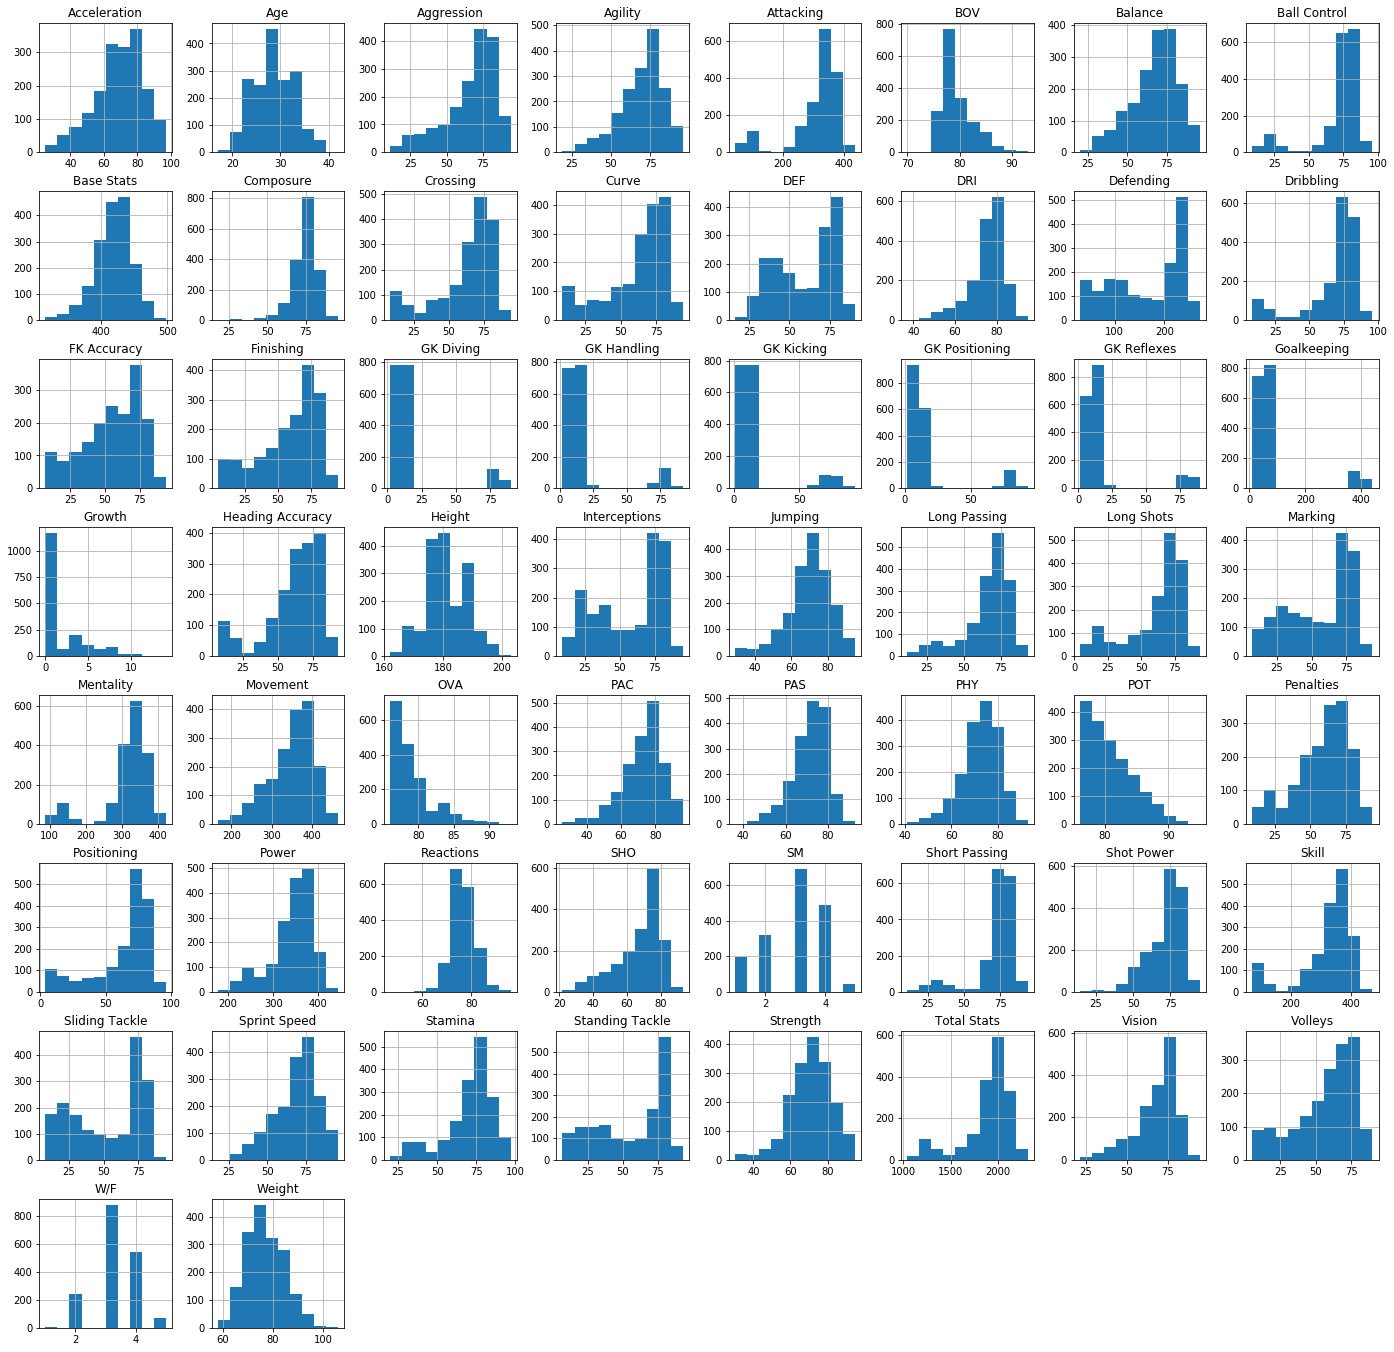

In [23]:
fifa.select_dtypes([np.number]).hist(figsize=(24,24))
plt.show()

it is interisting to see most of the data is either having a normal distribution or left skewness

at the moment I am intrested to check the central limit theorey,it states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution. 

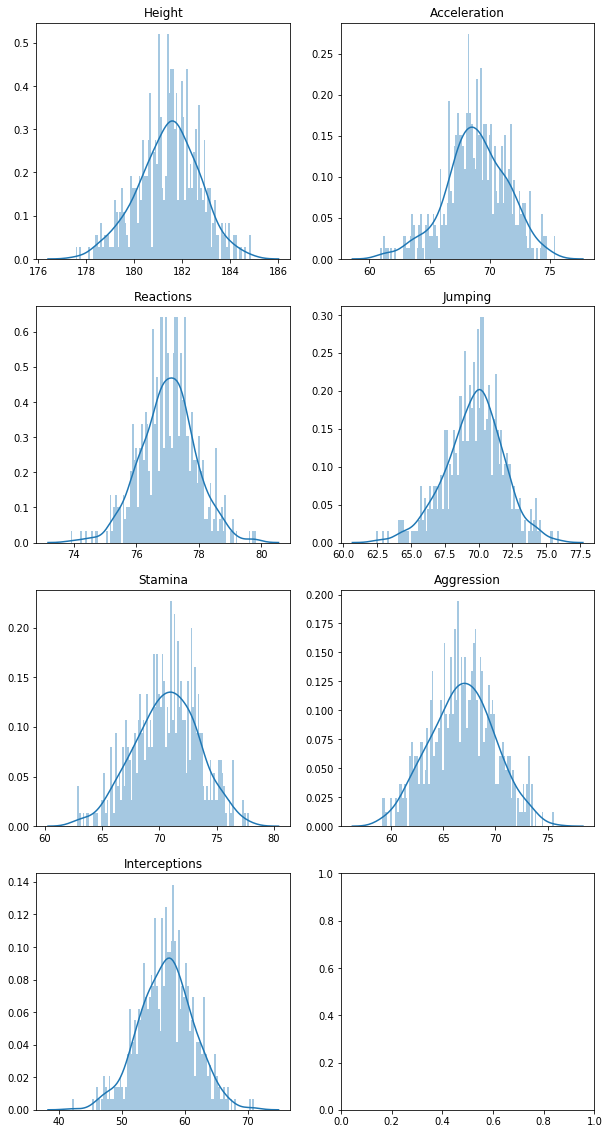

In [24]:
def sampler(population, n=30, k=500):
    sample_means = []
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means


m,n=0 ,0
fig, ax = plt.subplots(4,2,figsize=(10,20))
for i in ['Height','Acceleration','Reactions','Jumping','Stamina','Aggression','Interceptions']:
    sns.distplot(sampler(fifa[i]), bins=100, kde=True,ax=ax[n][m]).set_title(i)
    m+=1
    if m==2:
        n+=1
        m=0


Below I will create a function that find players with a the probability of being among the top 5% of the distribution 
The method based on the Z-Score test  and it is used to find the outlayers among the destribution,The z-score of an observation quantifies how many standard deviations the observation is away from the population mean, 
To find the value of Z, z=((x-mean)/std) and it is probabilty and doing the inverse to check.


In [25]:
def OP(dataframe, column,top=0.05):
    P=stats.norm.ppf(1-top)
    z=stats.zscore(dataframe[column])
    a,b,c,d,e,f=[],[],[],[],[],[]
    for x,i in  enumerate(z):
#this functi
        if z[x]>P:
            a.append(dataframe['Name'][x])
            b.append(dataframe['BP'][x])
            c.append(z[x])
            d.append(dataframe['Club'][x])
            e.append(dataframe['OVA'][x])
            f.append(dataframe['Nationality'][x])
            
    outstanding=pd.DataFrame()
    outstanding['name'] =a
    outstanding['club']=d
    outstanding['nationality']=f
    outstanding['position']=b
    outstanding['rating']=e
    outstanding['z value']=c
    outstanding=outstanding.sort_values(by=['z value'], ascending=False).reset_index(drop=True)
    
    del outstanding['z value']
    return outstanding

To get benefit from the last two functions, I am looking for  players with Gullit style meaning midfield players with high total stats

In [26]:
OP(midfield,'Total Stats')

,name,club,nationality,position,rating
0,K. De Bruyne,Manchester City,Belgium,CAM,91
1,Bruno Fernandes,Manchester United,Portugal,CAM,87
2,Paulinho,Guangzhou Evergrande Taobao FC,Brazil,CM,83
3,R. Nainggolan,Inter,Belgium,CDM,83
4,J. Kimmich,FC Bayern München,Germany,CDM,88
5,G. Wijnaldum,Liverpool,Netherlands,CM,85
6,L. Goretzka,FC Bayern München,Germany,CM,84
7,L. Modrić,Real Madrid,Croatia,CM,87
8,A. Vidal,Inter,Chile,CM,83
9,P. Pogba,Manchester United,France,CM,86


the relation between midfield players and there rating is never clear to me so I will look for an answer by using heat correlation map 

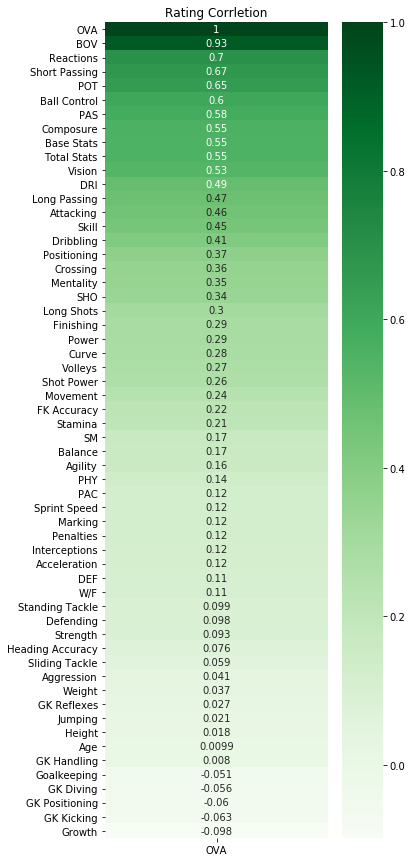

In [27]:
# the .corr() will return a corrletion matrix between all fields. I am intrested in rating effect so I will loc its row

corr = midfield.corr().loc[:,['OVA']]

fig, ax = plt.subplots(figsize=(5,15))

ax = sns.heatmap(corr.sort_values(by=['OVA'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Greens")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)
ax.set_title("Rating Corrletion")
plt.show()

The result shows it is highly related to short passing, ball control and reactions

Now I will create new field in attacking dataframe that will find the sum of columns that present the stats I am more concern in my strickers with penelty value based on the stat important to me

In [28]:
attacking.head(1)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,92,188,83,Right,0,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,89,93,81,89,35,77


In [29]:
A_stat=['Finishing','Heading Accuracy','Short Passing','Dribbling','Acceleration','Sprint Speed','Agility','Reactions','Balance',
      'Shot Power','Stamina','Strength','Long Shots','Positioning','Vision','Composure','W/F','SM']
A_panelty=[0.9,0.3,0.5,0.7,1.8,4,2,0.9,0.8,
         1.8,0.75,0.6,0.5,3,0.7,0.75,20*2,20*3]

S_stat=A_stat
S_stat.append('Crossing')
S_stat.append('Curve')
S_panelty=[0.6,0.2,3,3,2,2,2,2,2,
          1,3,2,1,2,3,2,20*2,20*3,2,1.5]

attacking['Important STAT']=0

for m in range(len(A_panelty)):
    attacking['Important STAT']+=A_panelty[m]*attacking[A_stat[m]]

sides['Important STAT']=0
for n in range(len(S_panelty)):
    sides['Important STAT']+=S_panelty[n]*sides[S_stat[n]]

In [30]:
OP(attacking,'Important STAT',0.1)

,name,club,nationality,position,rating
0,K. Mbappé,Paris Saint-Germain,France,ST,90
1,Cristiano Ronaldo,Juventus,Portugal,ST,92
2,W. Ben Yedder,AS Monaco,France,CF,84
3,P. Aubameyang,Arsenal,Gabon,ST,87
4,Roberto Firmino,Liverpool,Brazil,CF,87
5,S. Agüero,Manchester City,Argentina,ST,89
6,R. Lewandowski,FC Bayern München,Poland,ST,91
7,L. Martínez,Inter,Argentina,ST,84
8,Richarlison,Everton,Brazil,ST,81
9,D. Mertens,Napoli,Belgium,CF,85


In [31]:
OP(sides,'Important STAT')

,name,club,nationality,position,rating
0,Neymar Jr,Paris Saint-Germain,Brazil,LW,91
1,L. Messi,FC Barcelona,Argentina,RW,93
2,S. Mané,Liverpool,Senegal,LW,90
3,M. Salah,Liverpool,Egypt,RW,90
4,H. Son,Tottenham Hotspur,Korea Republic,LM,87
5,M. Rashford,Manchester United,England,RM,85
6,E. Hazard,Real Madrid,Belgium,LW,88
7,R. Sterling,Manchester City,England,LW,88
8,Bernardo Silva,Manchester City,Portugal,RW,87
9,R. Mahrez,Manchester City,Algeria,RW,85


The panelty it is not important as the value by it self but its value out of all other columns value since z-score value will be calculated
Now the important stats for definding will be diffrent so I will repeat the steps above
To me, I put my RB or LB on the instrecture stay back so thier passes are not important

In [32]:
defending.head(1)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,V. van Dijk,28,90,Netherlands,Liverpool,90,CB,91,193,92,Right,1,316,53,52,87,79,45.0,363,70,60.0,70,86,77,354,72,79,61.0,89,53.0,402,81,90.0,75,92,64,347,83,90.0,47.0,65.0,62,90.0,272,93,93,86.0,58,13,10,13,11,11,2112,455,3,2,Medium,Medium,76,60,71,71,91,86


In [33]:
D_stat=['Height','Acceleration','Sprint Speed','Reactions','Jumping','Stamina','Strength','Aggression','Interceptions',
       'Composure','Marking','Standing Tackle','Sliding Tackle']
D_panelty=[1.5,4,4,1,1,2,1,1.5,2,
          1,3,4,1]

defending['Important STAT']=0

for j in range(len(D_panelty)):
    defending['Important STAT']+=D_panelty[j]*defending[D_stat[j]]
   
OP(defending,'Important STAT')

,name,club,nationality,position,rating
0,V. van Dijk,Liverpool,Netherlands,CB,90
1,K. Walker,Manchester City,England,RB,85
2,R. Varane,Real Madrid,France,CB,86
3,F. Mendy,Real Madrid,France,LB,83
4,Nélson Semedo,Wolverhampton Wanderers,Portugal,RWB,83
5,K. Manolas,Napoli,Greece,CB,83
6,A. Davies,FC Bayern München,Canada,LB,81
7,K. Koulibaly,Napoli,Senegal,CB,88
8,W. Ndidi,Leicester City,Nigeria,CB,84
9,Sergio Ramos,Real Madrid,Spain,CB,89


I want to check if thre is a relation between the weight and highet of the defender and his stats

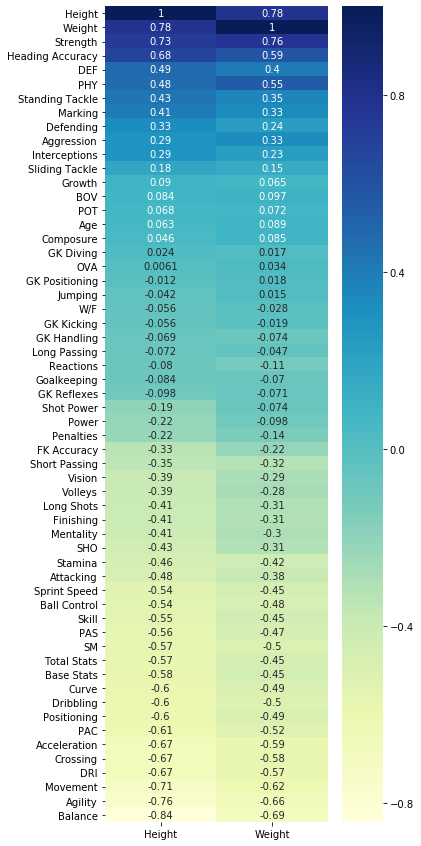

In [34]:
defender=defending.copy()
del defender['Important STAT']

corr = defender.corr().loc[:,['Height','Weight']]

fig, ax = plt.subplots(figsize=(5,15))

ax = sns.heatmap(corr.sort_values(by=['Height'],ascending=False), ax=ax,annot=True,cbar=True,cmap="YlGnBu")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

the graph shows both of them effect heading accurecy, DRI , Balance, Agility, Strength and movement
 but what is intresting to me is highet have more impact on Balance than weight, and height effects positining!
 

I am more intrested in defenders from Bundlisga so I will be able to have Nuer as my GoalKeeper, the code below will tackel this problem

In [35]:
Bundesliga=["1. FC Köln", "1. FSV Mainz 05", "DSC Arminia Bielefeld", "	Borussia Dortmund", "FC Augsburg", "FC Bayern München", "FC Schalke 04",
    "Eintracht Frankfurt", "Hertha BSC", "Bayer 04 Leverkusen", "Borussia Mönchengladbach", "RB Leipzig","SC Freiburg",
    "TSG 1899 Hoffenheim","1. FC Union Berlin", "VfB Stuttgart", "VfL Wolfsburg", "SV Werder Bremen"]


OP(defending[defending['Club'].isin(Bundesliga)].reset_index(drop=True),'Important STAT',0.1)

,name,club,nationality,position,rating
0,A. Davies,FC Bayern München,Canada,LB,81
1,L. Klostermann B,RB Leipzig,Germany,CB,80
2,K. Mbabu,VfL Wolfsburg,Switzerland,RB,79
3,N. Mukiele,RB Leipzig,France,CB,80
4,L. Hernández,FC Bayern München,France,CB,82
5,D. Alaba,FC Bayern München,Austria,CB,84


While going throw the results of Over Power players I have  seen some players assigned to wrong positions such as Ndidi,
anyhow I am confenced there are more players assigned to the wrong position, so I will check again for  middle players with Gullit style 

In [36]:
OP(fifa,'Total Stats',0.1)

,name,club,nationality,position,rating
0,L. Suárez,Atlético Madrid,Uruguay,ST,87
1,K. De Bruyne,Manchester City,Belgium,CAM,91
2,Bruno Fernandes,Manchester United,Portugal,CAM,87
3,A. Griezmann,FC Barcelona,France,ST,87
4,M. Acuña,Sevilla FC,Argentina,LB,83
5,Alex Telles,FC Porto,Brazil,LB,84
6,Paulinho,Guangzhou Evergrande Taobao FC,Brazil,CM,83
7,R. Nainggolan,Inter,Belgium,CDM,83
8,J. Kimmich,FC Bayern München,Germany,CDM,88
9,G. Wijnaldum,Liverpool,Netherlands,CM,85


The result shows that Griezmann and Tells could be realy good midfield players and E.can is a middle player who was assigned to CB position by mistake

after seeing the results, I have decided to use Rashford, Mertinz, Di Maria, Bruno Fernandes , Vidal, Naingolan, N. Mukiele, L.Hernández,L. Klostermann B,Alex Telles,Neuer

As I have chosse my defenders from Bundesliga because I like Neuer, it is time to find more details about GoalKeepres

In [37]:
GK.describe()

,Age,OVA,BOV,POT,Height,Weight,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,PAC,SHO,PAS,DRI,DEF,PHY
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,29.689266,79.762712,79.694915,81.350282,189.610169,83.903955,1.587571,90.231638,15.406780,13.338983,14.920904,32.581921,14.124608,103.056497,16.180791,16.111111,15.237288,32.344633,23.338983,264.158192,46.99435,47.124294,50.096045,75.796610,45.286880,239.146893,53.796610,67.491525,36.056497,68.152542,14.418079,135.971751,30.163842,20.937853,13.384181,49.952605,22.079096,57.106591,46.005650,17.073446,14.774011,14.319523,390.237288,79.943503,77.084746,73.824859,78.971751,81.186441,1268.807910,438.022599,2.661017,1.0,79.943503,77.084746,73.824859,81.186441,47.011299,78.971751
std,4.221098,3.394543,3.404146,3.970261,4.180652,5.730385,2.274978,16.105389,4.905187,3.511071,4.413881,9.710895,3.727313,20.069685,4.611137,5.554444,5.583068,11.029397,6.905886,32.972403,8.68482,8.701902,11.565424,4.809247,9.717853,20.074602,8.825543,9.196787,6.520699,8.564886,3.378628,24.529534,10.302870,8.472655,5.110081,11.382454,8.106147,10.313577,8.339049,5.311889,3.456680,3.168009,17.209279,3.502787,4.125674,6.386051,4.037367,3.966370,88.780676,20.070035,0.697646,0.0,3.502787,4.125674,6.386051,3.966370,8.257909,4.037367
min,20.000000,76.000000,76.000000,76.000000,180.000000,68.000000,0.000000,43.000000,8.000000,5.000000,7.000000,11.000000,5.000000,72.000000,8.000000,9.000000,7.000000,12.000000,9.000000,171.000000,26.00000,18.000000,19.000000,59.000000,20.000000,177.000000,14.000000,35.000000,20.000000,35.000000,4.000000,89.000000,11.000000,9.000000,4.000000,21.000000,9.000000,18.000000,29.000000,7.000000,7.000000,8.000000,323.000000,71.000000,67.000000,44.000000,72.000000,71.000000,1042.000000,397.000000,1.000000,1.0,71.000000,67.000000,44.000000,71.000000,23.000000,72.000000
25%,27.000000,77.000000,77.000000,78.000000,188.000000,79.000000,0.000000,80.000000,12.000000,11.000000,12.000000,26.000000,12.000000,90.000000,13.000000,12.000000,12.000000,24.000000,19.000000,243.000000,41.00000,42.000000,40.000000,73.000000,39.000000,226.000000,52.000000,62.000000,32.000000,64.000000,12.000000,122.000000,23.000000,17.000000,11.000000,42.000000,17.000000,54.000000,40.000000,13.000000,12.000000,12.000000,378.000000,77.000000,74.000000,70.000000,76.000000,78.000000,1211.000000,424.000000,2.000000,1.0,77.000000,74.000000,70.000000,78.000000,42.000000,76.000000
50%,29.000000,79.000000,79.000000,81.000000,190.000000,84.000000,0.000000,90.000000,14.000000,13.000000,14.000000,32.000000,14.000000,100.000000,15.000000,15.000000,14.000000,32.000000,23.000000,267.000000,48.00000,48.000000,51.000000,75.000000,45.000000,241.000000,56.000000,69.000000,36.000000,69.000000,14.000000,135.000000,29.000000,21.000000,13.000000,49.000000,22.000000,60.000000,45.000000,16.000000,14.000000,14.000000,389.000000,79.000000,77.000000,74.000000,78.000000,81.000000,1261.000000,435.000000,3.000000,1.0,79.000000,77.000000,74.000000,81.000000,4

In [38]:
X=GK.copy()

del X["Name"]
del X['Club']
del X['Nationality']
del X['D/W']
del X['A/W']
del X['foot']
del X['BP']

gk=X.copy()

X = pd.get_dummies(X, drop_first=True)

In [39]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X),columns=X.columns)

Assuming there is four types of goal keeprs I will check which players are more similer to Neuer by using Kmeans clustring

In [40]:
# now the similarity of the data will be investigated by applying supervised clustring first and then unsupervised
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4).fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
GK["Kmeans label"]=labels

gk["Kmeans label"]=labels


In [41]:
GK[GK['Club']=="FC Bayern München"]

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,Kmeans label
0,O. Kahn,38,87,Germany,FC Bayern München,87,GK,90,188,89,Right,3,84,21,21,21,21,12.0,113,21,12.666667,7,62,23,204,57,62,56.666667,85,55.333333,179,22,73.0,51,85,21,228,94,91.0,22.0,48.666667,21,65.666667,42,21,21,14.666667,346,83,88,62,92,83,1196,468,1,1,Medium,Medium,83,88,62,83,60,92,3
30,M. Neuer,34,89,Germany,FC Bayern München,89,GK,89,193,92,Right,0,119,15,13,25,55,11.0,160,30,14.000000,11,59,46,286,54,60,51.000000,86,35.000000,284,68,77.0,43,80,16,188,29,30.0,12.0,70.000000,47,70.000000,38,17,10,11.000000,440,87,87,91,86,89,1515,497,4,1,Medium,Medium,87,87,91,89,57,86,1
54,S. Ulreich,31,79,Germany,FC Bayern München,79,GK,79,193,87,Right,0,88,14,12,8,41,13.0,100,13,12.000000,15,38,22,234,41,40,36.000000,78,39.000000,220,51,66.0,29,63,11,111,25,14.0,8.0,42.000000,22,45.000000,48,16,18,14.000000,381,79,71,68,79,84,1182,421,2,1,Medium,Medium,79,71,68,84,40,79,0


from the dataframe I see Neuer is in cluster three, I will check other goal keeprs in his cluster

In [42]:
KM=GK[['Name','OVA','Nationality','Club']][GK['Kmeans label']==1].reset_index(drop=True)
KM.head(15)

,Name,OVA,Nationality,Club
0,S. Handanovič,88,Slovenia,Inter
1,J. Orozco,77,Mexico,Club Tijuana
2,K. Schmeichel,84,Denmark,Leicester City
3,S. Mandanda,83,France,Olympique de Marseille
4,Diego Alves,82,Brazil,Valencia CF
5,M. Neuer,89,Germany,FC Bayern München
6,H. Lloris,87,France,Tottenham Hotspur
7,S. Romero,80,Argentina,Manchester United
8,C. Bravo,77,Chile,Real Betis
9,N. Guzmán,79,Argentina,Tigres U.A.N.L.


The dataframe above had all the good goal keeprs  but I need more details so I will Apply DSBCAN to get a better result since the number of clusters is not important

In [43]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=2).fit(X)
clustering.labels_
GK['DSBCAN label']=clustering.labels_
gk['DSBCAN label']=clustering.labels_

I Will check how many clusters where found for goal keepers

In [44]:
GK['DSBCAN label'].value_counts()

-1    162
 0      6
 1      3
 4      2
 3      2
 2      2
Name: DSBCAN label, dtype: int64

In [45]:
GK[['Name','OVA','Nationality','Club','DSBCAN label']][GK['DSBCAN label']>=0].reset_index(drop=True)

,Name,OVA,Nationality,Club,DSBCAN label
0,Andrés Fernández,78,Spain,SD Huesca,0
1,B. Foster,79,England,Watford,0
2,T. Heaton,78,England,Aston Villa,0
3,S. Ruffier,81,France,AS Saint-Étienne,0
4,S. Sirigu,84,Italy,Torino,0
5,R. Bürki,84,Switzerland,Borussia Dortmund,0
6,Pacheco,82,Spain,Deportivo Alavés,1
7,José Sá,78,Portugal,Olympiacos CFP,2
8,S. Kritsyuk,78,Russia,Os Belenenses,2
9,W. Benítez,81,Argentina,OGC Nice,1


Neuer Did not apper in the small clusters so I will repeat KMeans with 20 clusters 

In [46]:
kmeans=KMeans(n_clusters=20).fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
GK["Kmeans label"]=labels

gk["Kmeans label"]=labels


In [47]:
GK[['Name',"Kmeans label"]][GK['Club']=="FC Bayern München"]

,Name,Kmeans label
0,O. Kahn,7
30,M. Neuer,5
54,S. Ulreich,1


I See now Neuer Is in cluster 19 so I Will check who else on it

In [48]:
GK[['Name','OVA','Nationality','Club']][GK["Kmeans label"]==7].reset_index(drop=True)

,Name,OVA,Nationality,Club
0,O. Kahn,87,Germany,FC Bayern München


Now that does make sense to me since all these goal keeprs are very good

finally I want to Know what effect these clusters

In [49]:
del GK['DSBCAN label']
GK["Kmeans label"]=GK["Kmeans label"].astype(str)

In [50]:
GK_Kmeans=pd.concat([GK,pd.get_dummies(GK["Kmeans label"])], axis = 1)

In [51]:
GK_Kmeans.head(2)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,Kmeans label,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
0,O. Kahn,38,87,Germany,FC Bayern München,87,GK,90,188,89,Right,3,84,21,21,21,21,12.000000,113,21,12.666667,7,62,23,204,57,62,56.666667,85,55.333333,179,22,73.0,51,85,21,228,94,91.0,22.0,48.666667,21,65.666667,42,21,21,14.666667,346,83,88,62,92,83,1196,468,1,1,Medium,Medium,83,88,62,83,60,92,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,J. Lehmann,39,79,Germany,VfB Stuttgart,81,GK,87,190,87,Right,8,90,21,21,21,27,13.055556,128,21,15.000000,10,75,22,171,49,54,48.333333,68,41.444444,179,29,63.0,55,74,21,291,78,81.0,58.0,47.944444,74,54.666667,42,21,21,13.888889,323,77,82,75,88,76,1224,450,3,1,Medium,Medium,77,82,75,76,52,88,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


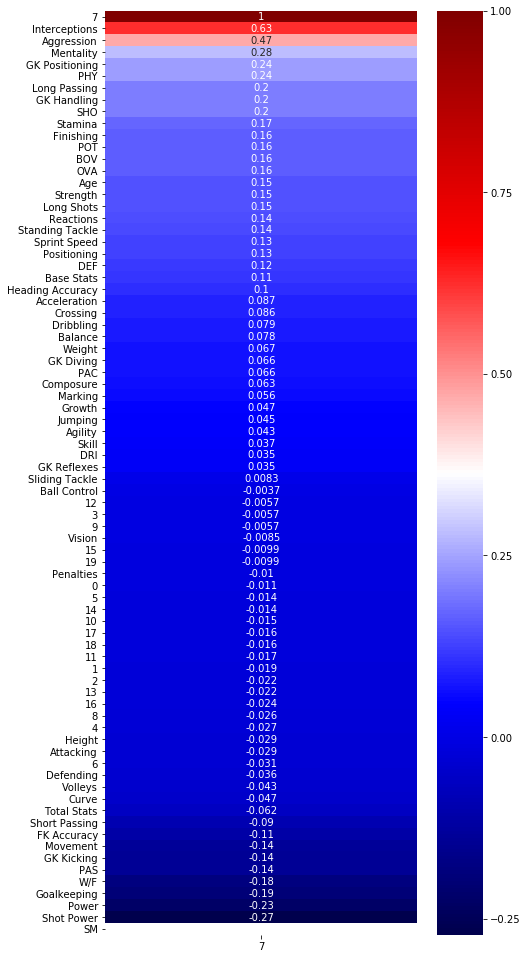

In [52]:
corr = GK_Kmeans.corr().loc[['7'],:].T

fig, ax = plt.subplots(figsize=(7,17))

ax = sns.heatmap(corr.sort_values(by=['7'],ascending=False), ax=ax,annot=True,cbar=True,cmap="seismic")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

it is intresting to see passing, skill and physical having an impact on cluster 19 or as I call it Neuer cluster but not highet! so I will check the effect of highet

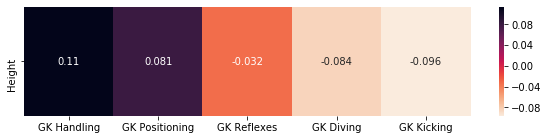

In [53]:
goalkeeper = GK[['GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes','Height']]
corr=goalkeeper.corr().loc[:,['Height']].T
del corr['Height']
fig, ax = plt.subplots(figsize=(10,2))

ax = sns.heatmap(corr.sort_values(by=['Height'],axis=1,ascending=False), ax=ax,annot=True,cbar=True,cmap="rocket_r")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

it almost has no impact!

The final thing I want to test is Benford’s law (also called the first digit law) states that the leading digits in a collection of data set are probably going to be small. For example, most numbers in a set (about 30%) will have a leading digit of 1, when the expected probability is 11.1% (i.e. one out of nine digits). This is followed by about 17.5% starting with a number 2. This is an unexpected phenomenon; If all leading numbers (0 through 9) had equal probability, each would occur 11.1% of the time. To put it simply, Benford’s law is a probability distribution for the likelihood of the first digit in a set of numbers

In [54]:
Benford=pd.DataFrame()
cols=['fifa','midfield','sides','attacking','defending']
for column in cols:
    Benford[column]=vars()[column].sum(axis =1, skipna = True).astype(int).astype(str).str[0]


Benford.head()

,fifa,midfield,sides,attacking,defending
0,7,8,1,1,1
1,7,8,1,1,1
2,7,8,1,1,1
3,6,7,1,9,9
4,7,8,1,9,1


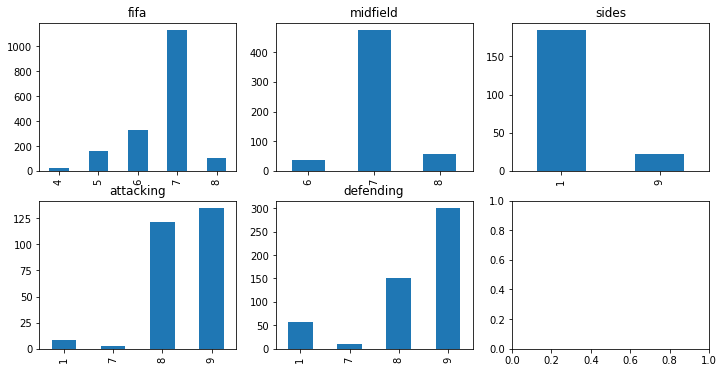

In [55]:
m,n=0 ,0
fig, ax = plt.subplots(2,3,figsize=(10,10))

for column in cols:
    Benford[column].value_counts().sort_index().plot(kind='bar',figsize=(12,6),title=column,ax=ax[n][m])
    m+=1
    if m==3:
        n+=1
        m=0

The result show that the theorey is not applicable may be because the data is not randomly selected